# Merge the 3 dataset and create 1 view of data

In [512]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [513]:
df = pd.read_csv('employee_data.csv')

In [514]:
df1 = pd.read_csv('insurance_data.csv')

In [515]:
df2 = pd.read_csv('vendor_data.csv')

In [516]:
pd.set_option('display.max_columns', None)

In [517]:
 #applying merge
df3 = df1.merge(df['AGENT_ID'])

In [518]:
# left join in python
df4= pd.merge(df1, df2, on='VENDOR_ID', how='left')

# Top 3 Insurance Type where we are getting most insurance claims


In [519]:
#topinsurancedf = topinsurancedf.groupby('INSURANCE_TYPE')['CLAIM_AMOUNT'].describe()

In [520]:
topinsurancedf_1 = df3.groupby('INSURANCE_TYPE')['CLAIM_AMOUNT'].sum().reset_index()

In [521]:
topinsurancedf_1 = topinsurancedf_1.set_index('INSURANCE_TYPE')

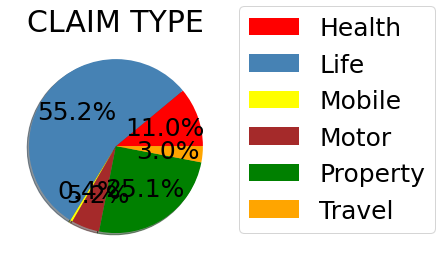

In [522]:
colors = ['red', 'steelblue','yellow','brown','green','orange']
data = topinsurancedf_1["CLAIM_AMOUNT"]
ax = topinsurancedf_1.plot(kind="pie",y = 'CLAIM_AMOUNT' ,autopct='%1.1f%%', shadow=True, colors=colors, legend=True, title='CLAIM TYPE', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1.01, 1.2), loc='upper left')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.rc('font', size=15) 
plt.show()

In [523]:
df_new= df3[['INSURANCE_TYPE','CLAIM_STATUS']].value_counts()

In [524]:
df_new

INSURANCE_TYPE  CLAIM_STATUS
Mobile          A               1608
Property        A               1608
Health          A               1605
Life            A               1605
Travel          A               1582
Motor           A               1489
Travel          D                 88
Health          D                 85
Motor           D                 85
Mobile          D                 84
Property        D                 84
Life            D                 77
dtype: int64

# More than 50 % claims are of life insurance followed by property and health claims.

In [525]:
unique_val = df3['INCIDENT_SEVERITY'].unique()

In [526]:
pd.set_option('display.max_columns', None)

In [527]:
df1.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,ROUTING_NUMBER,ACCT_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308,087-11-1946,Y,54,89,Y,3,L,Own,LI,109134974,HXJP58258181908465,Bachelor,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,Ricardo Gatlin,8595 West 81st Drive,NaN,Arvada,CO,80005,685-33-3536,N,61,80,Y,4,L,Rent,MI,40125819,JUND46859540983731,Bachelor,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,Lashawn Engles,637 Britannia Drive,NaN,Vallejo,CA,94591,378-36-0672,N,47,68,Y,6,L,Rent,MI,99513168,WGZZ90128415227650,PhD,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,Steven Bassett,2803 River Drive,NaN,Thunderbolt,GA,31404,669-92-1861,Y,36,16,Y,7,L,Mortgage,MI,18429110,WIKE91555436351397,Masters,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,Jason Rodriguez,7573 National Drive,NaN,Livermore,CA,94550,703-40-1033,Y,51,16,Y,2,M,Rent,HI,70752391,VYJW71311537294027,Masters,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [528]:
df1['RISK_SEGMENTATION'].value_counts().head()

L    4395
M    4150
H    1455
Name: RISK_SEGMENTATION, dtype: int64

In [529]:
dfdata = df1.groupby(['RISK_SEGMENTATION'])['INCIDENT_STATE'].value_counts()

In [530]:
dfdata

RISK_SEGMENTATION  INCIDENT_STATE
H                  CA                160
                   CT                108
                   CO                 99
                   FL                 99
                   GA                 94
                   AZ                 93
                   DC                 93
                   AL                 89
                   AR                 85
                   MD                 85
                   TN                 80
                   VT                 80
                   MA                 75
                   AK                 74
                   OK                 71
                   KY                 70
L                  CA                441
                   FL                307
                   CO                298
                   GA                288
                   AL                275
                   MA                264
                   AR                263
                   OK  

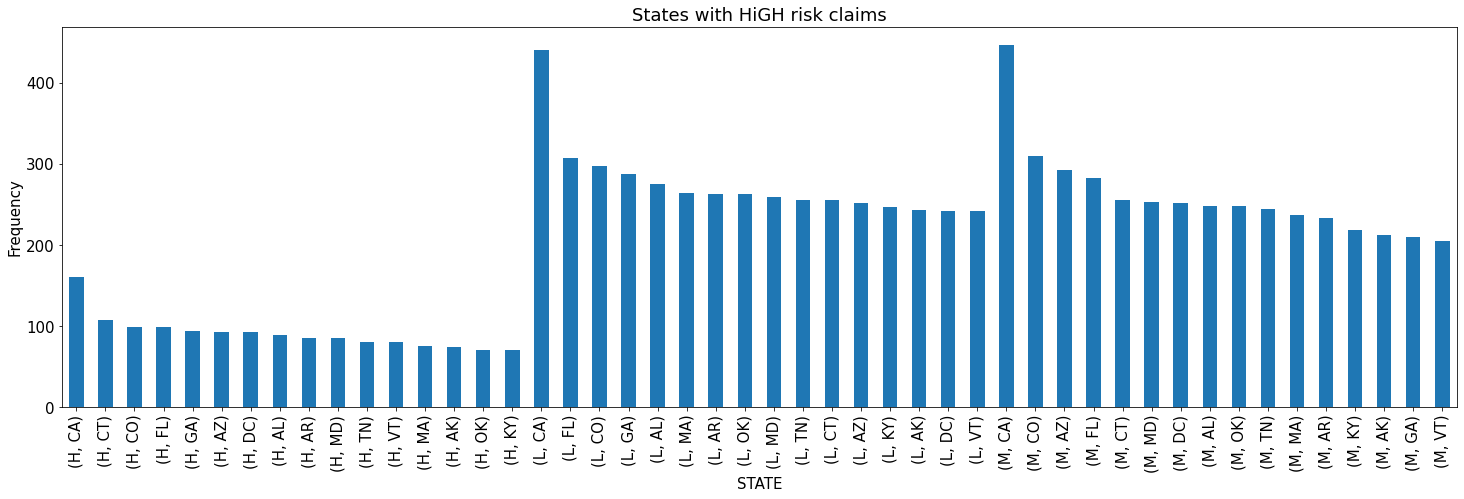

In [531]:
dfdata.plot(kind='bar', title='States with HiGH risk claims',ylabel='Frequency', xlabel='STATE', figsize=(25, 7))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('font', size=25) 

# Top 5 States where we are getting most insurance claims for customer belonging to HIGH(H) risk segment

In [532]:
# New column colocation introduced

In [533]:
df1['COLOCATION']=np.where((df1['STATE'] == df1['INCIDENT_STATE']) & (df1['STATE'] == df1['STATE']),1,0)

In [534]:
df1['COLOCATION'].value_counts()

0    9358
1     642
Name: COLOCATION, dtype: int64

In [535]:
df1['COLOCATION'].mean()

0.0642

In [536]:
df1['AUTHORITY_CONTACTED'].value_counts()

Ambulance    4082
Police       2982
None         1945
Other         991
Name: AUTHORITY_CONTACTED, dtype: int64

In [537]:
# If report avialable is 1 then authority contacted is police.

In [538]:
df1["AUTHORITY_CONTACTED"] = df1.apply(lambda x: "Police" if x["POLICE_REPORT_AVAILABLE"] == 1 else 'other',axis=1,)

In [539]:
df1["AUTHORITY_CONTACTED"].describe

<bound method NDFrame.describe of 0       Police
1        other
2       Police
3        other
4       Police
         ...  
9995    Police
9996     other
9997    Police
9998    Police
9999     other
Name: AUTHORITY_CONTACTED, Length: 10000, dtype: object>

In [540]:
#Claim Amount for deviation for each transaction

In [541]:
df1['TXN_DATE_TIME'] = pd.to_datetime(df1['TXN_DATE_TIME'])

In [542]:
df1['TXN_DATE_TIME'].min()

Timestamp('2020-06-01 00:00:00')

In [543]:
df1['TXN_DATE_TIME'].max()

Timestamp('2021-06-30 00:00:00')

In [544]:
newdata = df1.loc[(df1['TXN_DATE_TIME'] > '2021-05-31') & (df1['TXN_DATE_TIME'] < '2021-06-30')]

In [545]:
newdata['INSURANCE_TYPE'].value_counts()

Life        137
Health      131
Mobile      129
Property    122
Travel      121
Motor       119
Name: INSURANCE_TYPE, dtype: int64

In [546]:
newdata = newdata.groupby(['INSURANCE_TYPE'])['CLAIM_AMOUNT'].mean().reset_index()
newdata

,INSURANCE_TYPE,CLAIM_AMOUNT
0,Health,10954.198473
1,Life,52094.890511
2,Mobile,379.069767
3,Motor,5571.428571
4,Property,24811.475410
5,Travel,2809.917355


In [547]:

df1['CLAIM_DEVIATION'] = newdata['CLAIM_AMOUNT'].mean() / df1['CLAIM_AMOUNT']

In [548]:
df1['CLAIM_DEVIATION']=np.where(df1['CLAIM_DEVIATION']>=0.5,'0',df1['CLAIM_DEVIATION'])

In [549]:
df1[df1['CLAIM_DEVIATION']!= '0']

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,ROUTING_NUMBER,ACCT_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID,COLOCATION,CLAIM_DEVIATION
5,2020-06-01,TXN00000006,A00003571,PLC00007244,2012-12-28,2020-05-20,2020-05-25,Life,87.02,63000,Terrance Han,5275 North 59th Avenue,NaN,Glendale,AZ,85301,059-08-4065,N,42,38,Y,2,M,Rent,MI,124246313,TMDB19464299963687,College,A,Major Loss,Police,0,1,AZ,Glendale,0,AGENT00402,NaN,1,0.25561105843468185
10,2020-06-01,TXN00000011,A00007952,PLC00003007,2019-03-30,2020-05-20,2020-05-25,Life,61.45,92000,Janet Watts,200 Redwood Road,NaN,Manchester,CT,6040,233-66-3524,N,59,14,Y,7,M,Mortgage,MI,58804083,CQZQ73037026635053,Masters,A,Major Loss,Police,1,1,MD,Crofton,23,AGENT01091,VNDR00163,0,0.17503800740635822
13,2020-06-01,TXN00000014,A00007988,PLC00002521,2020-01-29,2020-05-18,2020-05-23,Life,64.16,51000,Felicita Stoughton,110 Oxford Road,NaN,Savannah,GA,31419,170-28-1062,N,31,118,Y,7,L,Own,LI,64537739,GIOA39230059052323,High School,A,Total Loss,other,1,0,AK,Anchorage,0,AGENT01094,NaN,0,0.3157548368899011
16,2020-06-01,TXN00000017,A00007184,PLC00000118,2014-04-17,2020-05-13,2020-05-18,Property,114.42,39000,Michael Kimball,42 Edison Road,NaN,Manchester,CT,6040,448-54-0272,Y,53,19,Y,5,M,Mortgage,MI,71737399,XHMQ62339445289593,Bachelor,A,Major Loss,Police,0,1,DC,Washington,2,AGENT00911,VNDR00238,0,0.41291017131756297
17,2020-06-01,TXN00000018,A00007426,PLC00000165,2015-03-25,2020-05-22,2020-05-25,Property,157.18,40000,Mark Huang,9545 West 74th Avenue,NaN,Arvada,CO,80005,696-53-5272,Y,32,106,Y,4,L,Mortgage,HI,47797949,AAET31045958150067,Bachelor,A,Major Loss,Police,0,1,AL,Montgomery,14,AGENT00079,NaN,0,0.40258741703462386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,2021-06-30,TXN00009986,A00001397,PLC00008000,2019-03-08,2021-06-20,2021-06-23,Life,97.20,93000,Lynette Provost,10202 Vista Drive,NaN,Cupertino,CA,95014,313-32-9470,N,56,37,Y,6,L,Own,LI,100062728,JQWN71512551695005,NaN,A,Total Loss,other,1,0,GA,Savannah,5,AGENT01104,VNDR00255,0,0.17315587829446188
9987,2021-06-30,TXN00009988,A00005204,PLC00006063,2012-11-22,2021-06-12,2021-06-17,Life,78.10,65000,Bernadine Contreras,25 Church Street,A,Pittsfield,MA,1201,252-04-8532,Y,32,71,Y,2,L,Own,MI,13595201,SGSC27837584514796,Bachelor,A,Total Loss,Police,1,1,CA,Hayward,11,AGENT00821,VNDR00186,0,0.24774610279053777
9993,2021-06-30,TXN00009994,A00008267,PLC00009629,2016-08-22,2021-06-22,2021-06-25,Life,91.53,78000,Roxanne Shipman,3102 Kinvara Lane,NaN,Louisville,KY,40242,355-62-7332,Y,44,41,Y,5,L,Own,LI,95228567,IAAI30164611107211,Bachelor,A,Minor Loss,Police,0,1,TN,Nashville,2,AGENT00770,VNDR00560,0,0.20645508565878148
9994,2021-06-30,TXN00009995,A00003508,PLC00009242,2011-10-01,2021-06-24,2021-06-26,Property,135.33,34000,Nakisha Johnson,416 McIver Street,NaN,Nashville,TN,37211,210-20-0690,Y,51,65,Y,2,M,Own,HI,26811639,IJJM08036916116324,PhD,A,Major Loss,other,1,0,OK,Edmond,6,AGENT00481,VNDR00262,0,0.4736322553348516


In [550]:
#All Agents who have worked on more than 2 types of Insurance Claims Sorting by Total Claim Amount Approved  in descending order

In [551]:
df1['AGENT_ID'].value_counts()

AGENT00992    19
AGENT00319    18
AGENT00388    17
AGENT00849    17
AGENT01097    16
              ..
AGENT00156     2
AGENT00536     2
AGENT01154     2
AGENT00252     1
AGENT01161     1
Name: AGENT_ID, Length: 1200, dtype: int64

In [552]:
dfinsurance = df1.groupby(['AGENT_ID','CLAIM_AMOUNT'])['INSURANCE_TYPE'].count().reset_index().sort_values('INSURANCE_TYPE', ascending=False)

In [553]:
dfmore = dfinsurance[dfinsurance['INSURANCE_TYPE']>2].sort_values('CLAIM_AMOUNT',ascending=False)

In [554]:
dfmore.set_index('AGENT_ID')

,CLAIM_AMOUNT,INSURANCE_TYPE
AGENT_ID,,
AGENT00794,20000,3
AGENT00688,20000,3
AGENT00889,20000,3
AGENT00752,19000,3
AGENT01125,15000,3
...,...,...
AGENT00379,300,3
AGENT00414,200,3
AGENT00732,100,3


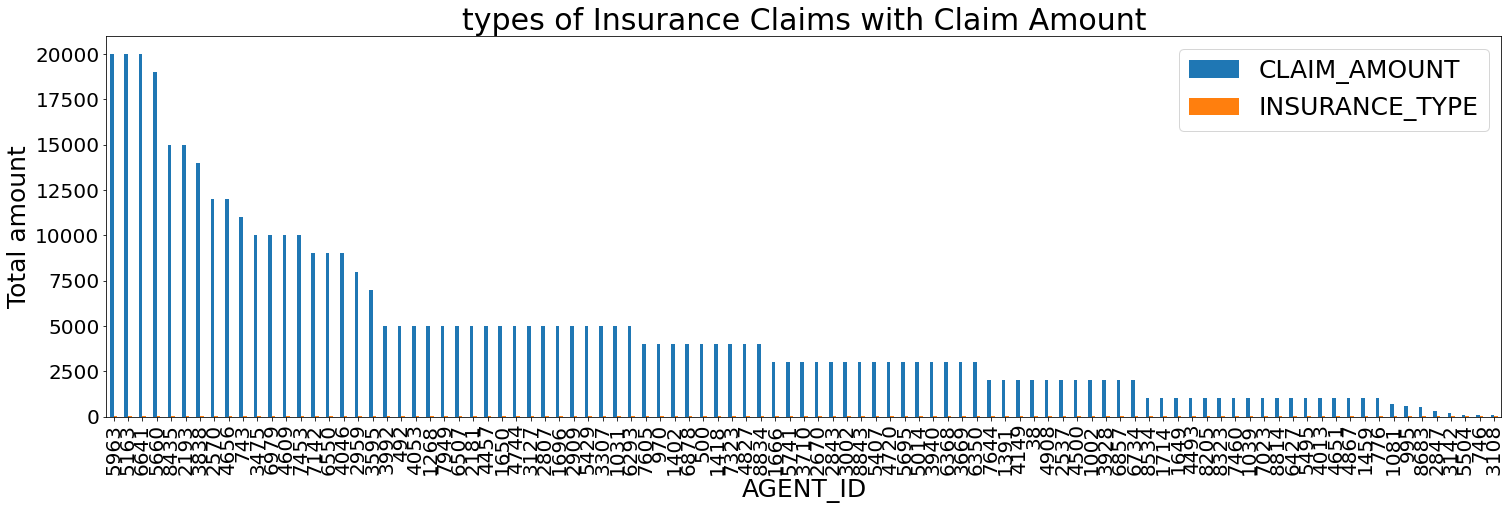

In [555]:
dfmore.plot(kind='bar', title='types of Insurance Claims with Claim Amount',ylabel='Total amount', xlabel='AGENT_ID', figsize=(25, 7))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=20)
plt.rc('font', size=30) 

In [354]:
#overall change in % of the Premium Amount Collected

In [355]:
totaldf = df1.groupby(['INSURANCE_TYPE'])['PREMIUM_AMOUNT'].sum().reset_index().sort_values('PREMIUM_AMOUNT', ascending=False)
totaldf

,INSURANCE_TYPE,PREMIUM_AMOUNT
0,Health,252455.73
4,Property,202285.83
3,Motor,165391.98
1,Life,125621.22
5,Travel,124139.77
2,Mobile,15191.42


In [356]:
totaldf['PREMIUM_AMOUNT'].sum()

885085.9500000001

In [357]:
totaldf['PERCENTAGE'] = (totaldf['PREMIUM_AMOUNT']/ totaldf['PREMIUM_AMOUNT'].sum())*100

In [358]:
Mobile = (15191.42 - (15191.42*0.1))
Travel = (124139.77 - (124139.77*0.1))
Health = (252455.73 + (252455.73*0.07))
Property =(202285.83 + (202285.83*0.07))
Life = (125621.22 + (125621.22*0.02))
Motor = (165391.98 + (165391.98*0.02))

In [359]:
list1 = [Health,Property,Motor,Life,Travel,Mobile]

In [360]:
totaldf['NEWAMOUNT'] = list1

In [361]:
totaldf['NEWPERCENTAGE'] = (totaldf['NEWAMOUNT']/ totaldf['NEWAMOUNT'].sum())*100

In [362]:
totaldf

,INSURANCE_TYPE,PREMIUM_AMOUNT,PERCENTAGE,NEWAMOUNT,NEWPERCENTAGE
0,Health,252455.73,28.523301,270127.6311,29.723387
4,Property,202285.83,22.854936,216445.8381,23.816532
3,Motor,165391.98,18.686545,168699.8196,18.562818
1,Life,125621.22,14.193110,128133.6444,14.099135
5,Travel,124139.77,14.025730,111725.7930,12.293704
2,Mobile,15191.42,1.716378,13672.2780,1.504424


In [363]:
newpercent = totaldf['NEWPERCENTAGE'] - totaldf['PERCENTAGE']

In [364]:
totaldf['PERCENTDIFFER'] = newpercent

In [365]:
dfdif = totaldf.drop(columns = ['PREMIUM_AMOUNT','PERCENTAGE','NEWAMOUNT','NEWPERCENTAGE'])

In [366]:
dfdif = dfdif.set_index('INSURANCE_TYPE')

In [367]:
dfdif

,PERCENTDIFFER
INSURANCE_TYPE,
Health,1.200086
Property,0.961596
Motor,-0.123726
Life,-0.093975
Travel,-1.732027
Mobile,-0.211954


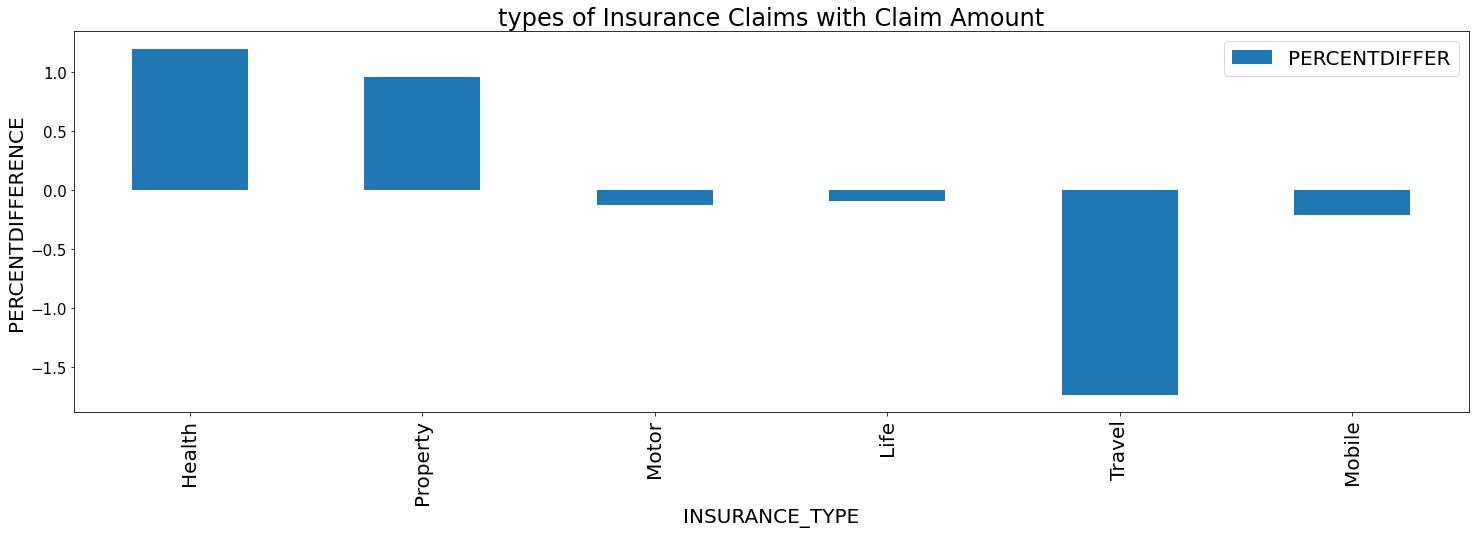

In [557]:
dfdif.plot(kind='bar', title='types of Insurance Claims with Claim Amount',ylabel='PERCENTDIFFERENCE', xlabel='INSURANCE_TYPE', figsize=(25, 7))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)
plt.rc('font', size=20) 

# overall change in % of the Premium Amount Collected..Travel industry is down by 1.7 % difference compared to average.

In [558]:
#new column created for CUSTOMER_TENURE > 60 AND EMPLOYMENT_STATUS = “N” AND NO_OF_FAMILY_MEMBERS >=4

In [559]:
df1['ELIGIBLE_FOR_DISCOUNT']=np.where(((df1['TENURE']>60) & (df1['EMPLOYMENT_STATUS']=='N') &(df1['NO_OF_FAMILY_MEMBERS']>=4)),1,0)

In [560]:
df1['ELIGIBLE_FOR_DISCOUNT'].mean()

0.0299

In [561]:
df1.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,ROUTING_NUMBER,ACCT_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID,COLOCATION,CLAIM_DEVIATION,ELIGIBLE_FOR_DISCOUNT
0,2020-06-01,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308,087-11-1946,Y,54,89,Y,3,L,Own,LI,109134974,HXJP58258181908465,Bachelor,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556,0,0,0
1,2020-06-01,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,Ricardo Gatlin,8595 West 81st Drive,NaN,Arvada,CO,80005,685-33-3536,N,61,80,Y,4,L,Rent,MI,40125819,JUND46859540983731,Bachelor,A,Total Loss,other,1,0,AL,Montgomery,0,AGENT00769,VNDR00592,0,0,0
2,2020-06-01,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,Lashawn Engles,637 Britannia Drive,NaN,Vallejo,CA,94591,378-36-0672,N,47,68,Y,6,L,Rent,MI,99513168,WGZZ90128415227650,PhD,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031,0,0,0
3,2020-06-01,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,Steven Bassett,2803 River Drive,NaN,Thunderbolt,GA,31404,669-92-1861,Y,36,16,Y,7,L,Mortgage,MI,18429110,WIKE91555436351397,Masters,A,Minor Loss,other,0,0,GA,Savannah,12,AGENT00278,VNDR00075,1,0,0
4,2020-06-01,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,Jason Rodriguez,7573 National Drive,NaN,Livermore,CA,94550,703-40-1033,Y,51,16,Y,2,M,Rent,HI,70752391,VYJW71311537294027,Masters,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472,0,0,0


In [562]:
last_30_days_claim_count = df1.loc[(df1['TXN_DATE_TIME']>'2021-05-31') & (df1['TXN_DATE_TIME']<'2021-06-30')]
last_3_days_claim_count = df1.loc[(df1['TXN_DATE_TIME']>'2021-06-27') & (df1['TXN_DATE_TIME']<'2021-06-30')]

In [563]:
last_30_days_claim_count.groupby(['INSURANCE_TYPE'])['CLAIM_STATUS'].count().reset_index()

,INSURANCE_TYPE,CLAIM_STATUS
0,Health,131
1,Life,137
2,Mobile,129
3,Motor,119
4,Property,122
5,Travel,121


In [564]:
last_3_days_claim_count.groupby(['INSURANCE_TYPE'])['CLAIM_STATUS'].count().reset_index()


,INSURANCE_TYPE,CLAIM_STATUS
0,Health,9
1,Life,9
2,Mobile,2
3,Motor,10
4,Property,9
5,Travel,12


In [565]:
claim_count = pd.DataFrame()
claim_count['Insurance_Type'] = ['Health', 'Life', 'Mobile', 'Motor', 'Property', 'Travel']
claim_count['Last_30_days_claim'] = [131, 137, 129, 119, 122, 121]
claim_count['Last_3_days_claim'] = [9, 9, 2, 10, 9, 12]
claim_count['CLAIM_VELOCITY'] = claim_count['Last_30_days_claim']/claim_count['Last_3_days_claim']
claimdf = claim_count.set_index('Insurance_Type')

In [566]:
claimdf

,Last_30_days_claim,Last_3_days_claim,CLAIM_VELOCITY
Insurance_Type,,,
Health,131,9,14.555556
Life,137,9,15.222222
Mobile,129,2,64.500000
Motor,119,10,11.900000
Property,122,9,13.555556
Travel,121,12,10.083333


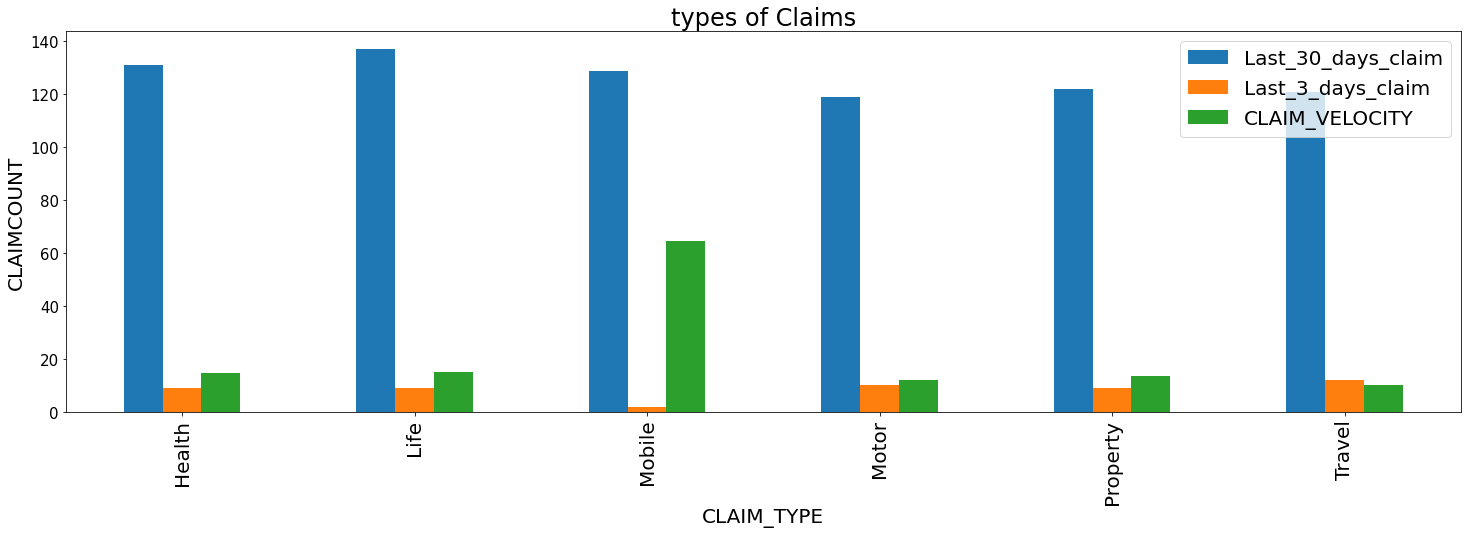

In [567]:
claimdf.plot(kind='bar', title='types of Claims',ylabel='CLAIMCOUNT', xlabel='CLAIM_TYPE', figsize=(25, 7))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15)
plt.rc('font', size=20) 

In [568]:
#employees who are in the bottom 5 percentile based on Claims worked by them.

In [569]:
Bottom = df1.groupby(['AGENT_ID','CUSTOMER_NAME'])['CLAIM_AMOUNT'].count().reset_index().sort_values('CLAIM_AMOUNT', ascending=True)
Bottom = Bottom.head(5)

In [570]:
claim = (Bottom['CLAIM_AMOUNT'] / 10000)*100

In [571]:
Bottom['CLAIM_PERCENTAGE'] = claim

In [572]:
Bottom

,AGENT_ID,CUSTOMER_NAME,CLAIM_AMOUNT,CLAIM_PERCENTAGE
0,AGENT00001,Amanda Denney,1,0.01
6663,AGENT00791,William Justiss,1,0.01
6664,AGENT00792,Betty Strickland,1,0.01
6665,AGENT00792,Jack Bren,1,0.01
6666,AGENT00792,John Sawyer,1,0.01


In [573]:
# Supspicious employees

In [574]:
df1['SUSPICIOUS_EMPLOYEES']=np.where(df1['CLAIM_AMOUNT']>=15000,1,0)

In [575]:
df1['CLAIM_STATUS']=np.where(df1['CLAIM_STATUS'] == 'A',1,0)

In [576]:
df1['RISK_SEGMENTATION']=np.where(df1['RISK_SEGMENTATION'] =='H',1,0)

In [577]:
df1['INCIDENT_SEVERITY']=np.where(df1['INCIDENT_SEVERITY'] == 'Major Loss',1,0)

In [578]:
dfinal = df1[['AGENT_ID','CUSTOMER_NAME','CLAIM_STATUS','RISK_SEGMENTATION','INCIDENT_SEVERITY','CLAIM_AMOUNT','SUSPICIOUS_EMPLOYEES']]

In [579]:
dfinal['CLAIM_STATUS'].mean()

0.9497

In [580]:
dfinal['SUSPICIOUS_EMPLOYEES'].mean()

0.3516

In [581]:
dfinal

,AGENT_ID,CUSTOMER_NAME,CLAIM_STATUS,RISK_SEGMENTATION,INCIDENT_SEVERITY,CLAIM_AMOUNT,SUSPICIOUS_EMPLOYEES
0,AGENT00413,Christopher Demarest,1,0,1,9000,0
1,AGENT00769,Ricardo Gatlin,1,0,0,26000,1
2,AGENT00883,Lashawn Engles,1,0,0,13000,0
3,AGENT00278,Steven Bassett,1,0,0,16000,1
4,AGENT00636,Jason Rodriguez,1,0,1,3000,0
...,...,...,...,...,...,...,...
9995,AGENT00779,Patrick Hauman,1,0,0,1000,0
9996,AGENT00254,Paula Noel,1,0,0,67000,1
9997,AGENT00786,Luis Clark,1,0,1,8000,0
9998,AGENT00927,Ryan Gordon,1,0,0,2000,0
